# **Proyecto del módulo 3 de BEDU: Procesamiento de datos con Python**

## **Integrantes**: 

* Viridiana Escarzaga Solis.
- Carlos Sebastián Madrigal Rodríguez.
- Diego Armando Morales Corona.
- Carlos Rodríguez Tenorio.





In [ ]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## **Contexto e identificación del problema**

Debido a los resultados que se obtuvieron del proyecto anterior en R, en esta ocasión se presentó la posibilidad de colaborar con la empresa "Physium", dedicada a servicios de entrenamiento y rehabilitación para los usuarios que realizan de forma errónea los ejercicios en gimnasios. La empresa está buscando implementar una app para que las personas desde casa puedan mejorar su técnica, sepan si hacen bien los ejercicios con mancuernas, además de poder recibir retroalimentación sobre sus rutinas o prevenir lesiones y mejorar el rendimiento de sus sets de entrenamiento. Lo anterior surge como consecuencia del cierre constante de los gimnasios debido a la pandemia y como consecuencia, la empresa está en busca de nuevas oportunidades en otras plataformas.


El presente estudio aborda un caso de reconocimiento de actividad humana (**HAR**, por sus siglas en íngles), 
disciplina que abarca el reconocimiento humano de actividades físicas y juega un rol importante el sector de la salud y el deporte.

Con el proposito de realizar análisis exploratorio y posteriormente proponer un modelo predictivo se hizo uso de un dataset con una variable objetivo con 5 clases, donde cada una representa una forma de hacer un curl de bíceps con mancuernas, ejecutados por 4 personas de buena salud y supervizadas por profesionales.

Mediante el uso de sensores se registro la clasificación de la repetición conforme a lo siguiente: 

* Clase A: La repetición se realizó correctamente.

* Clase B: La persona lanza los codos hacía el frente al hacer la repetición.

* Clase C: La persona levanta la mancuerna solo a la mitad. 

* Clase D: La persona baja la mancuerna solo hasta la mitad.

* Clase E: La persona arroja la cadera hacía el frente al hacer la repetición.

Dicho lo anterior, el problema básico se divide en dos partes: 

1. Procesamiento de los datos, limpieza y optimización. 

2. Desarrollo de un modelo predictivo que, con un nivel de confianza alto, prediga los casos en ejemplos nunca antes vistos.]

## **Planteamiento de preguntas clave.** 

A partir de este problema se formularon las siguientes preuntas clave para la solución del problema: 

1. ¿Es posible utilizar un dataset con valores de sensores para predecir si se realiza correctamente el ejercicio con mancuernas?

2. ¿La información contenida en el dataset es suficiente y correcta como para poder utilizarla en un modelo de clasificación?

3. ¿Podemos generar un csv limpio que funcione para las siguientes etapas de la aplicación móvil?

4. ¿Con qué nivel de confianza podemos generar predicciones con respecto a los datos de los sensores?

En este proyecto se buscará dar solución a estas preguntas (y a posibles otras más que se presenten en el camino) con el fin de poder desarrollar el producto requerido, paralelo a obtener más experiencia en el procesamiento de datos usando Python como lenguaje de programación. 












ok

## **Descripción del conjunto de datos**

<div class="container" text-aligne="justify" align="justify"> 

El conjunto de datos original se utiliza en este artículo: http://groupware.les.inf.puc-rio.br/har#literature.

Para resumir el artículo (y comprender el conjunto de datos), se pidió a 6 participantes que realizaran 5 formas de hacer un curl de bíceps con mancuernas, con 10 repeticiones por trayecto. De las 5 formas, el método A es correcto, mientras que los métodos B a E representan errores comunes.

Los movimientos se registran a través de 4 sensores montados en los cinturones, brazos, mancuernas y antebrazos de los participantes. Cada uno de estos sensores registra 3 ejes de 4 tipos de medición: ángulos de Euler (balanceo, cabeceo y guiñada), acelerómetro, giroscopio (orientación al centro gravitacional de la Tierra) y magnetómetro (orientación al norte magnético de la Tierra).

Entonces, por fila (por unidad de tiempo), deberíamos ver 48 columnas (4 posiciones de sensor x 3 ejes x 4 tipos de medición) de datos sin procesar. Las filas se dividen en intervalos de 1 segundo para calcular 8 características estadísticas: media, varianza, desviación estándar, máximo, mínimo, rango, curtosis y sesgo. Estas características estadísticas solo están presentes en filas que representan el final de cada intervalo de 1 segundo. 
</div>

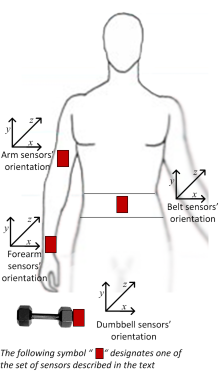

In [ ]:
#@title Muestra de la pocisión de los sensores { run: "auto", display-mode: "form" }
from IPython.display import Image
Image('/content/drive/MyDrive/Dataset Proyecto/on-body-sensing-schema.png', width = 250)

## **Análisis exploratorio de los datos**

Para esta parte, primero importamos las paqueterias que vamos a requerir para manipular en primer instancia nuestro dataset: _pandas_ y _numpy_. 

Las opciones escritas en _set_ __option_ se requieren para poder visualizar de mejor manera la mayor parte del dataset.

In [ ]:
import pandas as pd
import numpy as np
import pprint
pd.set_option('display.max_columns', 160)
pd.set_option('display.max_rows', 160)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv', 
                   low_memory=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Sobre los datos y sus tipos.

Es esencial dar una vista inicial de los datos que vamos a utilizar. Se puede apreciar que la base de datos cuenta con 39,242 registros y 157 columnas. 

Con la vista inicial nos damos cuenta que tenemos presencia de, tanto variables categóricas, numericas, tipo datetime, estre otras, también podemos notar la presencia de columnas con valor Nan en ellas.

Desde la primera columna hasta la penúltima, son las características con las que se trabajará, mientras que la última columna (_classe_) indica el grupo al cuál pertenece el registro. 

In [ ]:
print('Tamaño del dataset: ', data.shape)
print('-' * 100)
data.head()


Tamaño del dataset:  (39242, 157)
----------------------------------------------------------------------------------------------------


,user_name,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,var_accel_arm,avg_roll_arm,stddev_roll_arm,var_roll_arm,avg_pitch_arm,stddev_pitch_arm,var_pitch_arm,avg_yaw_arm,stddev_yaw_arm,var_yaw_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,kurtosis_roll_arm,kurtosis_picth_arm,kurtosis_yaw_arm,skewness_roll_arm,skewness_pitch_arm,skewness_yaw_arm,max_roll_arm,max_picth_arm,max_yaw_arm,min_roll_arm,min_pitch_arm,min_yaw_arm,amplitude_roll_arm,amplitude_pitch_arm,amplitude_yaw_arm,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,kurtosis_roll_dumbbell,kurtosis_picth_dumbbell,kurtosis_yaw_dumbbell,skewness_roll_dumbbell,skewness_pitch_dumbbell,skewness_yaw_dumbbell,max_roll_dumbbell,max_picth_dumbbell,max_yaw_dumbbell,min_roll_dumbbell,min_pitch_dumbbell,min_yaw_dumbbell,amplitude_roll_dumbbell,amplitude_pitch_dumbbell,amplitude_yaw_dumbbell,total_accel_dumbbell,var_accel_dumbbell,avg_roll_dumbbell,stddev_roll_dumbbell,var_roll_dumbbell,avg_pitch_dumbbell,stddev_pitch_dumbbell,var_pitch_dumbbell,avg_yaw_dumbbell,stddev_yaw_dumbbell,var_yaw_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,28/11/2011 14:15,no,1,3.70,41.6,-82.8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.02,0.18,0.02,-3,-18,22,387,525,-267,132.0,-43.7,-53.6,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.65,-0.61,-0.02,143,30,-346,556,-205,-374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.235540,11.698847,104.264727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.31,0.16,0.08,5,21,37,-471.0,191.0,277.0,-111.0,26.5,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,-0.37,-0.43,-170.0,155.0,184,-1160.0,1400.0,-876.0,E
1,eurico,28/11/2011 14:15,no,1,3.66,42.8,-82.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.96,0.14,0.05,-2,-13,16,405,512,-254,129.0,-45.3,-49.0,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.79,-0.64,-0.11,146,35,-339,599,-206,-335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.824418,9.645819,100.228053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.31,0.14,0.07,4,22,35,-472.0,184.0,281.0,-112.0,26.2,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.06,-0.37,-0.59,-178.0,164.0,182,-1150.0,1410.0,-871.0

Para ver de mejor forma los tipos de datos presentes, utilizamos el atributo _dtypes_.

Podemos notar que solo hay tres tipos de datos: _object, int64 y float64_; pero hay que recordar también hay fechas en este dataset, por lo que vamos a preprocesar los datos antes de utilizarlos.

In [ ]:
data.dtypes.head(15)

user_name                object
cvtd_timestamp           object
new_window               object
num_window                int64
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
kurtosis_roll_belt       object
kurtosis_picth_belt      object
kurtosis_yaw_belt        object
skewness_roll_belt       object
skewness_roll_belt.1     object
skewness_yaw_belt        object
max_roll_belt           float64
dtype: object

### Sobre los Nan

Ya analizados los tipos de datos y echando una vista preeliminar a estos, tocá el turno de revisar los registros vacíos. 

Recordemos que el número de registros en este dataset era de 39,242 por lo que el siguiente pedazo de código muestra la proporción de valores Nan por columna respecto al número total de registros. En particular, notamos que se cuentan con columnas que contiene porporciones de Nan mayores al 90% del total de registros, por lo que es conveniente deshacernos de estas, ya que no aportan información suficiente para el total de registros.



In [ ]:
data.isna().sum()*100 / data.shape[0]

user_name                    0.000000
cvtd_timestamp               0.000000
new_window                   0.000000
num_window                   0.000000
roll_belt                    0.000000
pitch_belt                   0.000000
yaw_belt                     0.000000
total_accel_belt             0.000000
kurtosis_roll_belt          97.861985
kurtosis_picth_belt         97.861985
kurtosis_yaw_belt           97.861985
skewness_roll_belt          97.861985
skewness_roll_belt.1        97.861985
skewness_yaw_belt           97.861985
max_roll_belt               97.861985
max_picth_belt              97.861985
max_yaw_belt                97.861985
min_roll_belt               97.861985
min_pitch_belt              97.861985
min_yaw_belt                97.861985
amplitude_roll_belt         97.861985
amplitude_pitch_belt        97.861985
amplitude_yaw_belt          97.861985
var_total_accel_belt        97.861985
avg_roll_belt               97.859436
stddev_roll_belt            97.861985
var_roll_bel

## **Limpieza de los datos**

### Limpieza de Nan presentes
 
Como ya se mencionó en el punto anterior, la presencia de Nan nos impide poder realizar un buen análisis de los datos, en particular, la presencia de Nan impacta directamente en la creación de modelos predictivos. En esta ocasión nos desharemos de estas columnas que cuentan con un porcentaje de valores nulos mayores al 90%.

In [ ]:
data = data.dropna(axis=1, thresh= 38402)
data.head(10)

,user_name,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,28/11/2011 14:15,no,1,3.70,41.6,-82.8,3,2.02,0.18,0.02,-3,-18,22,387,525,-267,132.0,-43.7,-53.60,38,2.65,-0.61,-0.02,143,30,-346,556,-205,-374,51.235540,11.698847,104.264727,4,-0.31,0.16,0.08,5,21,37,-471.0,191.0,277.0,-111.0,26.5,138.0,30,-0.05,-0.37,-0.43,-170.0,155.0,184,-1160.0,1400.0,-876.0,E
1,eurico,28/11/2011 14:15,no,1,3.66,42.8,-82.5,2,1.96,0.14,0.05,-2,-13,16,405,512,-254,129.0,-45.3,-49.00,38,2.79,-0.64,-0.11,146,35,-339,599,-206,-335,55.824418,9.645819,100.228053,4,-0.31,0.14,0.07,4,22,35,-472.0,184.0,281.0,-112.0,26.2,138.0,31,-0.06,-0.37,-0.59,-178.0,164.0,182,-1150.0,1410.0,-871.0,E
2,eurico,28/11/2011 14:15,no,1,3.58,43.7,-82.3,1,1.88,0.08,0.05,-2,-6,8,409,511,-244,125.0,-46.8,-43.70,35,2.91,-0.69,-0.15,156,44,-307,613,-198,-319,55.469831,6.875244,101.084106,4,-0.31,0.16,0.05,3,23,37,-468.0,190.0,275.0,-114.0,26.0,137.0,32,-0.05,-0.27,-0.72,-182.0,172.0,185,-1130.0,1400.0,-863.0,E
3,eurico,28/11/2011 14:15,no,1,3.56,44.4,-82.1,1,1.80,0.03,0.08,-6,-5,7,422,513,-221,120.0,-48.1,-38.10,35,3.08,-0.72,-0.23,158,52,-305,646,-186,-268,55.944860,11.079297,99.784556,5,-0.31,0.16,0.07,5,24,38,-469.0,184.0,285.0,-115.0,25.8,137.0,33,0.02,-0.24,-0.79,-185.0,182.0,188,-1120.0,1400.0,-855.0,E
4,eurico,28/11/2011 14:15,no,1,3.57,45.1,-81.9,1,1.77,0.00,0.13,-4,-9,0,418,508,-208,115.0,-49.1,-31.70,34,3.20,-0.77,-0.25,163,55,-288,670,-175,-241,55.211739,11.426833,100.422583,4,-0.31,0.14,0.07,5,23,37,-468.0,189.0,292.0,-117.0,25.5,137.0,34,0.08,-0.27,-0.82,-188.0,195.0,188,-1100.0,1400.0,-843.0,E
5,eurico,28/11/2011 14:15,no,1,3.45,45.6,-81.9,1,1.75,-0.03,0.16,1,-9,-5,432,510,-189,110.0,-49.6,-25.80,33,3.31,-0.83,-0.30,160,59,-274,696,-174,-193,54.247306,14.126636,100.615738,4,-0.31,0.14,0.07,6,22,36,-473.0,188.0,278.0,-118.0,25.1,137.0,36,0.14,-0.29,-0.82,-208.0,207.0,190,-1090.0,1400.0,-838.0,E
6,eurico,28/11/2011 14:15,no,1,3.31,46.2,-81.9,3,1.78,-0.06,0.15,1,-24,-8,438,508,-176,104.0,-49.9,-18.50,29,3.50,-0.83,-0.31,165,67,-225,721,-161,-121,55.465904,14.413128,99.334712,4,-0.29,0.14,0.07,6,22,35,-471.0,183.0,284.0,-120.0,24.8,136.0,37,0.21,-0.24,-0.84,-215.0,214.0,190,-1060.0,1410.0,-831.0,E
7,eurico,28/11/2011 14:15,no,1,2.91,46.9,-82.2,4,1.75,-0.06,0.23,2,-36,-9,440,503,-163,98.6,-49.7,-11.40,28,3.53,-0.83,-0.21,153,70,-218,725,-152,-105,57.970163,7.150976,98.553842,4,-0.29,0.14,0.07,3,23,35,-476.0,184.0,283.0,-122.0,24.5,135.0,37,0.27,-0.18,-0.85,-212.0,221.0,190,-1060.0,1410.0,-829.0,E
8,eurico,28/11/2011 14:15,no,1,2.31,47.4,-82.6,2,1.65,-0.03,0.33,-1,-19,-7,443,507,-140,93.2,-49.0,-4.49,27,3.40,-0.83,-0.11,143,78,-205,740,-133,-43,54.247306,14.126636,100.615738,4,-0.29,0.14,0.08,6,22,36,-474.0,186.0,278.0,-124.0,24.0,135.0,38,0.37,-0.21,-0.87,-221.0,223.0,194,-1040.0,1400.0,-819.0,E
9,eurico,28/11/2011 14:15,no,1,2.00,47.7,-82.8,3,1.48,-0.06,0.21,-18,18,1,449,499,-132,88.5,-48.1,1.82,22,3.48,-0.80,-0.15,135,96,-134,741,-115,14,54.852294,12.447054,100.510048,4,-0.29,0.14,0.07,5,21,34,-470.0,188.0,283.0,-126.0,23.4,134.0,39,0.43,-0.26,-0.89,-220.0,239.0,196,-1020.0,1410.0,-804.0,E


Con el cambio anterior redujimos la dimensión de nuestro dataset, de 157 columnas quedando solo con 57. Este cambio asegura que omitimos aquellas columnas que no aportaban información a los registros. 

In [ ]:
print('El tamaño del dataset omitiendo las columnas con más de 90% de Nan: ', data.shape)

El tamaño del dataset omitiendo las columnas con más de 90% de Nan:  (39242, 57)


Volvemos a checar los valores nulos presentes, y nos damos cuenta que solo en la columna _roll_dumbbell_, se encuentra un único valor Nan, por lo que, para este caso particular, utilizaremos la función _fillna_ para llenar este valor Nan por el valor medio de esa misma columna. 

In [ ]:
print('Las columnas con valores Nan son: ', data.columns[data.isna().any()])
print('-'*100)
print('Columna', ' '*8, 'Valores nulos')
print(data[data.columns[data.isna().any()]].isna().sum())

data = data.fillna(data.dropna().mean())

Las columnas con valores Nan son:  Index(['roll_dumbbell'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna          Valores nulos
roll_dumbbell    1
dtype: int64


Entonces, revisamos de nuevo los valores vacíos en el dataset y nos damos cuenta que ya no hay columnas con Nan en este dataset:


In [ ]:
print('Las columnas con valores Nan son: ', data.columns[data.isna().any()])

Las columnas con valores Nan son:  Index([], dtype='object')


### Limpieza sobre los tipos de datos.
 
Con las 57 columnas restantes, podemos notar varios aspectos:
 
* Desde la columna *roll_belt* hasta la columna *magnet_forearm_z* son registros númericos proporcionados por el estudio, por lo que su formato en _int64_ y _float64_ no presenta ningún problema en estas columnas.
 
* La columna _classes_, al ser la columna objetivo, cuenta con las variables A, B, C, D y E, donde cada una representa un categoria distinta, por lo que no hay problema alguno en mantenerla de este formato. 
 
* La columna *user_name* denota el nombre de la persona de la que proviene el registro, no hay problema en manterla como tipo _object_.
 
* La columna *cvtd_timestamp* representa mediciones de fechas, por lo que es conveniente convertir el tipo de dato, hay que considerar que esta columna no aporta información a el modelo predictivo que se desarrollará, pero transformaremos el tipo de dato de todas formas.
 
* Las columnas *new_window y num_window*, son columnas de referencia utilizadas por los autores del dataset, para términos del modelo predictivo no aportan información.

In [ ]:
data.dtypes

user_name                object
cvtd_timestamp           object
new_window               object
num_window                int64
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
accel_belt_z              int64
magnet_belt_x             int64
magnet_belt_y             int64
magnet_belt_z             int64
roll_arm                float64
pitch_arm               float64
yaw_arm                 float64
total_accel_arm           int64
gyros_arm_x             float64
gyros_arm_y             float64
gyros_arm_z             float64
accel_arm_x               int64
accel_arm_y               int64
accel_arm_z               int64
magnet_arm_x              int64
magnet_arm_y              int64
magnet_arm_z              int64
roll_dumbbell           float64
pitch_du

Con la función *to_datetime* transformamos la columna *cvtd_timestamp* a una columna de tipo fecha, por lo que los datos en todo el dataset esta libre de valores Nan y en el tipo de dato en el que deben estar.

In [ ]:
data['cvtd_timestamp'] = pd.to_datetime(data['cvtd_timestamp'])
data.dtypes

user_name                       object
cvtd_timestamp          datetime64[ns]
new_window                      object
num_window                       int64
roll_belt                      float64
pitch_belt                     float64
yaw_belt                       float64
total_accel_belt                 int64
gyros_belt_x                   float64
gyros_belt_y                   float64
gyros_belt_z                   float64
accel_belt_x                     int64
accel_belt_y                     int64
accel_belt_z                     int64
magnet_belt_x                    int64
magnet_belt_y                    int64
magnet_belt_z                    int64
roll_arm                       float64
pitch_arm                      float64
yaw_arm                        float64
total_accel_arm                  int64
gyros_arm_x                    float64
gyros_arm_y                    float64
gyros_arm_z                    float64
accel_arm_x                      int64
accel_arm_y              

### Dataset limpio

Después de los cambios y limpiezas realizadas, contamos con un dataset con 39,242 registros y 57 columnas (para el modelo este número se reducirá), sin Nan y cada columna con el tipo de dato adecuado.



In [ ]:
print('El tamaño del dataset: ', data.shape)
print('-'*80)
print('Los Nan presentes en el dataset: ', data.isna().sum().sum())
print('-'*80)
print('Tipos de datos en el dataset: ')
print(data.dtypes.value_counts())
print('-'*80)
data.head()

El tamaño del dataset:  (39242, 57)
--------------------------------------------------------------------------------
Los Nan presentes en el dataset:  0
--------------------------------------------------------------------------------
Tipos de datos en el dataset: 
float64           32
int64             21
object             3
datetime64[ns]     1
dtype: int64
--------------------------------------------------------------------------------


,user_name,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,2011-11-28 14:15:00,no,1,3.70,41.6,-82.8,3,2.02,0.18,0.02,-3,-18,22,387,525,-267,132.0,-43.7,-53.6,38,2.65,-0.61,-0.02,143,30,-346,556,-205,-374,51.235540,11.698847,104.264727,4,-0.31,0.16,0.08,5,21,37,-471.0,191.0,277.0,-111.0,26.5,138.0,30,-0.05,-0.37,-0.43,-170.0,155.0,184,-1160.0,1400.0,-876.0,E
1,eurico,2011-11-28 14:15:00,no,1,3.66,42.8,-82.5,2,1.96,0.14,0.05,-2,-13,16,405,512,-254,129.0,-45.3,-49.0,38,2.79,-0.64,-0.11,146,35,-339,599,-206,-335,55.824418,9.645819,100.228053,4,-0.31,0.14,0.07,4,22,35,-472.0,184.0,281.0,-112.0,26.2,138.0,31,-0.06,-0.37,-0.59,-178.0,164.0,182,-1150.0,1410.0,-871.0,E
2,eurico,2011-11-28 14:15:00,no,1,3.58,43.7,-82.3,1,1.88,0.08,0.05,-2,-6,8,409,511,-244,125.0,-46.8,-43.7,35,2.91,-0.69,-0.15,156,44,-307,613,-198,-319,55.469831,6.875244,101.084106,4,-0.31,0.16,0.05,3,23,37,-468.0,190.0,275.0,-114.0,26.0,137.0,32,-0.05,-0.27,-0.72,-182.0,172.0,185,-1130.0,1400.0,-863.0,E
3,eurico,2011-11-28 14:15:00,no,1,3.56,44.4,-82.1,1,1.80,0.03,0.08,-6,-5,7,422,513,-221,120.0,-48.1,-38.1,35,3.08,-0.72,-0.23,158,52,-305,646,-186,-268,55.944860,11.079297,99.784556,5,-0.31,0.16,0.07,5,24,38,-469.0,184.0,285.0,-115.0,25.8,137.0,33,0.02,-0.24,-0.79,-185.0,182.0,188,-1120.0,1400.0,-855.0,E
4,eurico,2011-11-28 14:15:00,no,1,3.57,45.1,-81.9,1,1.77,0.00,0.13,-4,-9,0,418,508,-208,115.0,-49.1,-31.7,34,3.20,-0.77,-0.25,163,55,-288,670,-175,-241,55.211739,11.426833,100.422583,4,-0.31,0.14,0.07,5,23,37,-468.0,189.0,292.0,-117.0,25.5,137.0,34,0.08,-0.27,-0.82,-188.0,195.0,188,-1100.0,1400.0,-843.0,E


Como paso complementario, guardaremos este dataset limpio, para posteriormente tener un acceso más rápido y evitar tener que correr todo el código anterior.


In [ ]:
data.to_csv('/content/drive/MyDrive/Dataset Proyecto/Dataset_limpio.csv')

## **Transformación y manejo de los datos.**

Posterior a la limpieza de la base de datos, podemos comenzar el modelado. Primeramente, extraeremos las variables que aportan información cuantitativa sobre cada registro, es decir, omitiremos las columnas *_user_name, cvtd_timestamp, new_window y num_window_*, que son variables cualitativas de cada registro y que dificultan su manejo en el modelado.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Dataset_limpio.csv', index_col=0)

In [ ]:
data = data.loc[:,['roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt', 'gyros_belt_x',
       'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x', 'accel_belt_y',
       'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z',
       'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x',
       'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x', 'accel_arm_y',
       'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
       'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forearm_z', 'classe'] ]

### Análisis visual de los datos.

Los diagramas de dispersión 3D se utilizan para trazar puntos de datos en tres ejes en un intento de mostrar la relación entre tres variables. Cada fila de la tabla de datos está representada por un marcador cuya posición depende de sus valores en las columnas establecidas en los ejes X, Y y Z. Estos ejes se obtienen de las coordenadoas en espacio real que estuvieron los sensores y giroscopios al desplazarse cuando los usuarios realizaban algun ejercicio. 

Las graficas trazaran los puntos en un espacio de 3 dimensiones, a su vez dandole color dependiendo en de la "clase" en que se encuentren, donde la clase se interpreta por la calidad y efectividad del ejercicio que se esta desempeñando.

La clase es un rango de valores que denotan el desempeño del ejercicio donde:
A => El ejercicio se realizo correctamente.
-
E => El ejercicio no se efectuo correctamente.

Debido al comportamiento que se prenento en las graficas, se llego a la conclusion de que no se puede hacer una separacion lineal de los datos y se tiene que recurrir a modelos no lineales.

In [ ]:
import matplotlib
import matplotlib.cm as cmx
from matplotlib import pyplot
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

def scatter3d(x,y,z, clases, titulo, colorsMap='jet'):
    colores = ('red', 'green', 'blue', 'pink', 'black')
    fig = pyplot.figure()
    ax = Axes3D(fig)
    for datax, datay, dataz, clase in zip(x,y,z,clases):
      #Para el renderizado de los colores se utilizo una tecnica de
      #optimizacion llamada "Branchless programming".
      ax.scatter(datax, datay, dataz, c=colores[((0*(clase == "A")) + 
                                      (1*(clase == "B")) + 
                                      (2*(clase == "C")) + 
                                      (3*(clase == "D")) + 
                                      (4*(clase == "E")))])
    
    lineas = [Line2D([0], [0], color='r'),
              Line2D([0], [0], color='g'),
              Line2D([0], [0], color='b'),
              Line2D([0], [0], color='pink'),
              Line2D([0], [0], color='black')]
    ax.set_title(titulo)
    ax.legend(lineas, ['A', 'B', 'C', 'D', 'E'], loc='center left')
    pyplot.show()

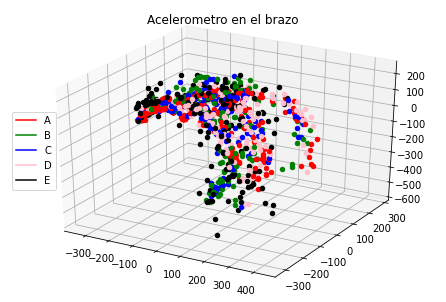

In [ ]:
muestra = data.sample(1000)
 
scatter3d(list(muestra.accel_arm_x), 
          list(muestra.accel_arm_y), 
          list(muestra.accel_arm_z),
          list(muestra.classe), "Acelerometro en el brazo")

Resultados de los sensores situados en los brazos al realizar los ejercicios.

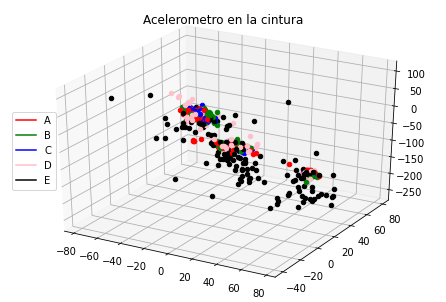

In [ ]:
scatter3d(list(muestra.accel_belt_x), 
          list(muestra.accel_belt_y), 
          list(muestra.accel_belt_z),
          list(muestra.classe), "Acelerometro en la cintura")

Resultados de los sensores situados en la cintura al realizar los ejercicios.

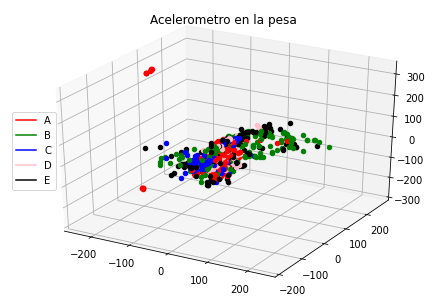

In [ ]:
scatter3d(list(muestra.accel_dumbbell_x), 
          list(muestra.accel_dumbbell_y), 
          list(muestra.accel_dumbbell_z),
          list(muestra.classe), "Acelerometro en la pesa")

Resultados de los sensores situados en la pesa.

### Variables necesarias.

Dividimos nuestro dataset en dos conjuntos *X, y*, donde *X* contiene los datos de cada registro y *y* contiene la variable objetivo, en este caso la variable *classe*.

In [ ]:
X = data.iloc[:, 0:data.shape[1]-1]
y = data.iloc[:, -1]

print('Dimensión de los datos de cada registro (X): ', X.shape)
print('Dimensión de la variable objetivo (y): ', y.shape)

Dimensión de los datos de cada registro (X):  (39242, 52)
Dimensión de la variable objetivo (y):  (39242,)


Con la división anterior, importamos la librería *sklearn*, en partícular la función *train_test_split*, esto para dividir los conjuntos anteriores (X, y), en los conjuntos *X_train, X_test, y_train, y_test*. Los conjuntos con terminación *_train* se utilizarán para entrenar el modelo mientras que los conjuntos con terminación *_test* se usarán para medir el rendimiento de el mismo modelo. 

El parámetro *test_size* indica la proporción del dataset que estará en el conjunto de prueba, mientras que el parámetro *random_state* se inicializa en 1, con el objetivo de que esta línea sea reproducible en cualquier momento con los mismos resultados.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state = 1)

Un aspecto importante a considerar es revisar si nuestros datos estan, o no, sesgados por alguna categoría, es decir, que la mayor proporción de los datos caigan en una sola categoría, esto implicaría consideran diversas metrícas para calificar el rendimiento del modelo. 

La proporción entre las categorías se mantiene en ambos conjuntos, si bien es cierto, la categoría A tiene una mayor proporción en ambos conjuntos (con un 28%), pero esto no significa estrictamente que los datos se encuentren extremadamente sesgados por esta categoría. Para trabajar esto, nos centraremos en dos métricas fundamentales:

* [accuracy](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/#Accuracy_Exactitud): Proporción de clases bien predichas con respecto al total de predicciones.

* [f1_score](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/#F1): El valor F1 se utiliza para combinar las medidas de [*precision*](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/#Precision_Precision) y [*recall*](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/#Recall_Exhaustividad) en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

In [ ]:
print('Proporción de los valores de y en el train set (%): ')
print(y_train.value_counts() * 100/y_train.shape[0])
print('-'*70)
print('Proporción de los valores de y en el test set (%): ')
print(y_test.value_counts()*100 / y_test.shape[0])

Proporción de los valores de y en el train set (%): 
A    28.450253
B    19.429175
E    18.373439
C    17.274018
D    16.473115
Name: classe, dtype: float64
----------------------------------------------------------------------
Proporción de los valores de y en el test set (%): 
A    28.403975
B    19.162490
E    18.406523
C    17.828931
D    16.198080
Name: classe, dtype: float64


### Modelado preeliminar.

Después de tratar de ajustar los datos con diversos algoritmos, tales como árboles de decisión, bosques aleatorios o regresión logística con rendimientos pobres, se ajusto usando maquinas de soporte de vectores, con los parámetros por defecto.




In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
model = SVC()
fit = model.fit(X_train, y_train)

In [ ]:
pred = fit.predict(X_test)

El rendimiento de este modelo inicial inidico que se alcanzó una exactitud(*accuracy*) en el conjunto de pruba de 0.85, es decir, el 85% de las predicciones se realizaron correctamente. Mientras que el *f1_score*, marcó un valor muy parecido. Por lo que SVM funciona de manera excelente para modelar estos datos.

In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred, labels=['A', 'B', 'C', 'D', 'E'], average= 'weighted'))
print('Recall: ',recall_score(y_test, pred, labels=['A', 'B', 'C', 'D', 'E'], average= 'weighted'))
print('f1_score', f1_score(y_test, pred, labels=['A', 'B', 'C', 'D', 'E'], average= 'weighted'))


Accuracy:  0.8585747048330926
Precision:  0.8638200241761474
Recall:  0.8585747048330926
f1_score 0.858458350993025


La [*matriz de confusión*](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/#Confusion_Matrix_Matriz_de_Confusion), en este caso normalizada, nos da la proporción de valores reales, por clase, que se predijieron correctamente (las proporciones de la diagonal de la matriz), observamos que para la mayoria de las clases se pudo predecir correctamente poco más del 80% de los datos, teniendo el peor rendimiento para la clase D, en la cual se pudo prededir correctamente el 79% de los casos. El 96% de la etiquetas A (ejercicio realizado correctamente) pudieron predecirse bien.

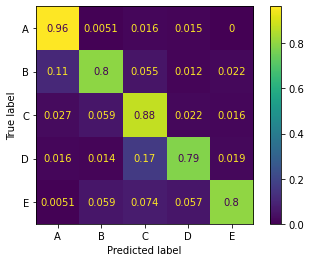

In [ ]:
plot_confusion_matrix(fit, X_test, y_test, normalize='true')  
plt.show() 

### Hiperparametrización el modelo.

Los [hiperparámetros](https://www.analyticslane.com/2019/12/16/cual-es-la-diferencia-entre-parametro-e-hiperparametro/) de un modelo son los valores de las configuraciones utilizadas durante el proceso de entrenamiento. Son valores que generalmente se no se obtienen de los datos, por lo que suelen ser indicados por el científico de datos. 

En este trabajo se trabajará con el parámetro de [regularización (C)](https://es.wikipedia.org/wiki/Regularizaci%C3%B3n_(matem%C3%A1ticas)), el cual se encarga de tratar de evitar que le modelado se sobreajuste a los datos de entrenamiento. 

Con la función *GridSearchCV*, podemos introducir un diccionario de hiperparámetros para el modelo y este se encarga de ajustar el mejor modelo con cada parámetro o combinación de parámetros (de ser el caso), dando, como resultado, un modelo óptimo.


En este caso, además de variar el parámetro de regularización, con el parámetro *cv* de la función indicamos que queremos que realice [*validación cruzada*](https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada) en el conjunto de entrenamiento, esto es, para ajustar el modelo dividimos el conjunto de entrenamiento nuevamente en dos conjuntos, uno de ellos servirá para entrenar el modelo y el segundo servirá para evaluar el desempeño de este modelo creado. En particular, inicializamos el valor de *cv* igual a 5, lo cual indicá que hará el proceso explicado anterioriormente 5 veces por hiperparámetro y la respueta del modelo será el promedio de los resultados obtenidos por cada modelo contruido.

Para resumir, se esta optimizando el modelo con la implementación de diversos valores de regularización y el uso de validación cruzada para obtener el modelo optimo. 

In [ ]:
from sklearn.model_selection import GridSearchCV

Con la siguinete línea de código, inicializamos el diccionario y creamos el objeto que creará el modelo. 

In [ ]:
param_grid = [{'C': [0.01, 0.1, 10, 50, 100]}]
 
model = SVC()
grid = GridSearchCV(model, param_grid, cv = 5)

Posteriormente, comenzamos con el modelado (este proceso puede tardar un poco de tiempo): 

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 10, 50, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Ya ajustado el mejor modelo, obtenemos los siguientes resultados:

In [ ]:
## Mejores parametros
print('Mejor parámetro de regularización: ', grid.best_params_)
print('-'*80)
print('-'*80)
print('Información de las validaciones cruzadas por hiperparámetro: ')
print('')
grid.cv_results_

Mejor parámetro de regularización:  {'C': 100}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Información de las validaciones cruzadas por hiperparámetro: 



{'mean_fit_time': array([80.20821075, 59.36820745, 16.68720727, 12.51144385, 11.66918464]),
 'mean_score_time': array([10.54626813,  9.54529252,  4.31119237,  2.88038611,  2.43093371]),
 'mean_test_score': array([0.44715822, 0.69649367, 0.93774784, 0.97145873, 0.98026868]),
 'param_C': masked_array(data=[0.01, 0.1, 10, 50, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 10}, {'C': 50}, {'C': 100}],
 'rank_test_score': array([5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.45303968, 0.7022206 , 0.94011649, 0.97415362, 0.98289043]),
 'split1_test_score': array([0.4532217 , 0.69639607, 0.93465599, 0.9717874 , 0.98052421]),
 'split2_test_score': array([0.43502002, 0.69548598, 0.93538406, 0.9663269 , 0.97524572]),
 'split3_test_score': array([0.45813615, 0.70713506, 0.94539498, 0.97360757, 0.98198034]),
 'split4_test_score': array([0.43637357, 0.68123066, 0.93318769, 0.9

El modelo ajustado con el parámetro de regularización *C = 100*, presento el mejor comportamiento en los conjuntos de validación cruzada para cada una de las divisiones que se realizaron, teniendo una exactitud arriba de 97% en todas la pruebas. 

### Modelo final.

Con la información anterior entrenamos el modelo de Maquina de Soporte de Vectores con el parámetro de regularización *C = 100*

In [ ]:
final_model = SVC(C=100, random_state= 1)
final_model.fit(X_train, y_train)



SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

Posteriormente, realizamos las predicciones con el conjunto de prueba. Es importante mencionar que el conjunto de prueba NO se utilizó en ningún momento, ni en el entrenamiento ni en la hiperparametrización del mismo; pues únicamente se usa para realizar las predicciones y obtener cuántos de los resultados se predicen de forma correcta.

In [ ]:
predictions = final_model.predict(X_test)

Con esto, obtenemos una exactitud del 98.26% de las predicciones, y obtenemos un f1_score con un valor muy parecido, de 0.9826.  

Esta métricas son calculadas con el parámetro *average= 'weighted'*, lo cual indica que se calculan para cada etiqueta y encuentra su promedio ponderado por soporte (el número de instancias verdaderas para cada etiqueta).

In [ ]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions, labels=['A', 'B', 'C', 'D', 'E'], average= 'weighted'))
print('Recall: ',recall_score(y_test, predictions, labels=['A', 'B', 'C', 'D', 'E'], average= 'weighted'))
print('f1_score', f1_score(y_test, predictions, labels=['A', 'B', 'C', 'D', 'E'], average= 'weighted'))

Accuracy:  0.9826722160876582
Precision:  0.9829062316805021
Recall:  0.9826722160876582
f1_score 0.9826680694997978


Con esta última matriz de confusión podemos notar que el rendimiento en el conjunto de prueba es excelente, la gran mayoría de etiquetas se predicen de manera eficiente y, en general, el modelo es sumamente confliable para hacer predicciones.

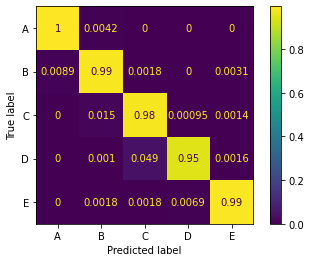

In [ ]:
plot_confusion_matrix(final_model, X_test, y_test, normalize='true')  
plt.show() 

## **Realizando predicciones simuladas.**

En esta última parte realizaremos predicciones simuladas. Es decir, si alguien tiene un conjunto de datos que quiera probar con nuestro modelo para predecir su resultado; puede conocer a qué clase pertenece e identificar si el ejercicio se lleva a cabo de forma correcta o no.

En este caso, con la función *np.random.normal* obtenemos un valor de una variable aleatoria normal por columna del dataset, parametrizada por la media y desviación estándar de esa misma columna, este valor se simula en la función *simular_valores()*, para posteriormente utilizar la función *predict*, y así predecir la etiqueta o clase que le correspondería a este valor en particular.


In [ ]:
## NOTA: Ejecutar solo una vez. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Dataset_limpio.csv', index_col=0)
data = data.loc[:,['roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt', 'gyros_belt_x',
       'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x', 'accel_belt_y',
       'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z',
       'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x',
       'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x', 'accel_arm_y',
       'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
       'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forearm_z', 'classe'] ]
X = data.iloc[:, 0:data.shape[1]-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state = 1)

final_model = SVC(C=100, random_state= 1)
final_model.fit(X_train, y_train)

# -----------------------------------------------------------------------------------------
def simular_valores(data):
  '''
      Esta función calcula la media y desviación estándar por columna, y con 
      esto simular un valor de una variable aleatoria normal, regresa un array 
      con valores simulados por columna
  '''
  means = data.mean(axis=0)
  stds = data.std(axis=0)

  simulados = []

  for i in range(0,len(means)):
    simulados.append(np.random.normal(means[i], stds[i], 1)[0])
  return simulados

# -----------------------------------------------------------------------------------------

def predecir_categoría():
  '''
      Realiza la predicción de la categoría y notifica al usuario si el 
      ejercicio se realizó de manera correcta o si hubo algún tipo de error, 
      en este saco lo específica.
  '''

  nuevo_registro = simular_valores(data)
  print('El registro que se predecirá es: ')
  print('')
  auxiliar = pd.Series(nuevo_registro, index = X.columns)
  print(auxiliar)
  print('-'* 80)
  print('-'* 80)
  print('Según el modelo, el nuevo registro pertenecé a la clase: ', final_model.predict([nuevo_registro]))
  if final_model.predict([nuevo_registro]) == ['A']:
    print('¡Excelente!, El ejercicio fue correctamente realizado')
  elif final_model.predict([nuevo_registro]) == ['B']: 
    print('¡Cuidado! Estas lanzando los codos al frente al levantar las mancuernas.')
  elif final_model.predict([nuevo_registro]) == ['C']: 
    print('¡Cuidado! Estas levantando la mancuerna solo a la mitad.') 
  elif final_model.predict([nuevo_registro]) == ['D']: 
    print('¡Cuidado! Estas bajando la mancuerna solo a la mitad.') 
  elif final_model.predict([nuevo_registro]) == ['E']: 
    print('¡Cuidado! Estas arrojando la cadera hacia el frente.')
# -----------------------------------------------------------------------------------------

FileNotFoundError: ignored

In [ ]:
## NOTA: Ejecuta cuantas veces quieras esta celda de código.
predecir_categoría()

El registro que se predecirá es: 

roll_belt               117.702441
pitch_belt              -11.092743
yaw_belt                -50.215613
total_accel_belt          4.893848
gyros_belt_x             -0.174547
gyros_belt_y              0.133316
gyros_belt_z             -0.128111
accel_belt_x            -32.047971
accel_belt_y             69.571720
accel_belt_z             23.261446
magnet_belt_x            83.189230
magnet_belt_y           565.784499
magnet_belt_z          -362.520183
roll_arm                 55.476476
pitch_arm                24.961854
yaw_arm                  10.038176
total_accel_arm          39.421165
gyros_arm_x              -2.032412
gyros_arm_y               1.047753
gyros_arm_z              -0.085097
accel_arm_x             -64.572560
accel_arm_y            -136.079810
accel_arm_z            -129.437212
magnet_arm_x            459.596963
magnet_arm_y            381.990702
magnet_arm_z            451.314190
roll_dumbbell            60.310201
pitch_dumbbell      

## **Referencias**

*Velloso, E.; Bulling, A.; Gellersen, H.; Ugulino, W.; Fuks, H. Qualitative Activity Recognition of Weight Lifting Exercises. Proceedings of 4th International Conference in Cooperation with SIGCHI (Augmented Human '13) . Stuttgart, Germany: ACM SIGCHI, 2013.*

Read more: http://groupware.les.inf.puc-rio.br/har#literature#ixzz6p1ewyEDb